In [4]:
import numpy as np
import scipy.special 
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate): #initialise
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        
    def train(self, inputs_list, targets_list): #train the NN
        
        inputs = np.array(inputs_list, ndmin = 2).T
        
        targets = np.array(targets_list, ndmin = 2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        
    
    def query(self, input_list): #query the NN
        
        inputs = np.array(input_list, ndmin = 2).T #input list to 2d array
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        
    def backquery(self, targets_list):
        final_outputs = np.array(targets_list, ndmin = 2).T
        final_inputs = self.inverse_activation_function(final_outputs)
        
        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
        
        
        
        
        

In [57]:
n = neuralNetwork(3,3,3,0.3)

In [7]:
n.query([1.0, 0.5, -1.5])

array([[0.66474721],
       [0.53391407],
       [0.80134005]])

In [8]:
data_file = open("mnist_dataset/mnist_train_100.csv")
data_list = data_file.readlines()
data_file.close()

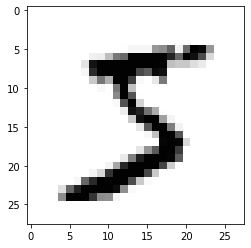

In [9]:
all_values = data_list[0].split(',')
img_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(img_array, cmap = 'Greys', interpolation = 'None')

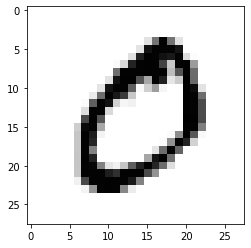

In [10]:
all_values = data_list[1].split(',')
img_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(img_array, cmap = 'Greys', interpolation = 'None')

In [11]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) +0.01
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [12]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

## MNIST 

In [62]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [63]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [64]:
epochs = 1 #change to 2

for e in range(epochs):

    for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = np.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)

In [73]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

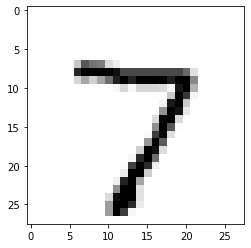

In [74]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation='None')

In [75]:
all_values = test_data_list[0].split(',')

n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00607876],
       [0.00273539],
       [0.00591139],
       [0.00280364],
       [0.00152776],
       [0.00447075],
       [0.00531207],
       [0.99216934],
       [0.00180832],
       [0.00413645]])

In [76]:
scorecard = []

In [77]:
for record in test_data_list:
    
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    
    #print(correct_label, " correct label")
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = n.query(inputs)
    
    label = np.argmax(outputs)
    
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    
    

In [78]:
print(scorecard[:20])

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [45]:
scorecard_array = np.asarray(scorecard)

print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.9683333333333334


## Backquerying

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


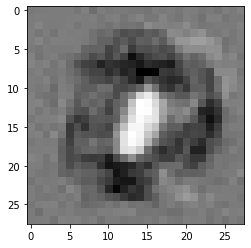

In [79]:
label = 0 

targets = np.zeros(output_nodes) + 0.01
targets[label] = 0.99

print(targets)

image_data = n.backquery(targets)

plt.imshow(image_data.reshape(28,28), cmap = 'Greys', interpolation = 'None')

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


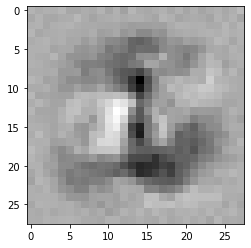

In [80]:
label = 1 

targets = np.zeros(output_nodes) + 0.01
targets[label] = 0.99

print(targets)

image_data = n.backquery(targets)

plt.imshow(image_data.reshape(28,28), cmap = 'Greys', interpolation = 'None')
    

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


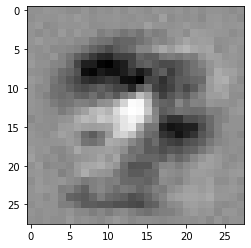

In [81]:
label = 7 

targets = np.zeros(output_nodes) + 0.01
targets[label] = 0.99

print(targets)

image_data = n.backquery(targets)

plt.imshow(image_data.reshape(28,28), cmap = 'Greys', interpolation = 'None')

## Rotations